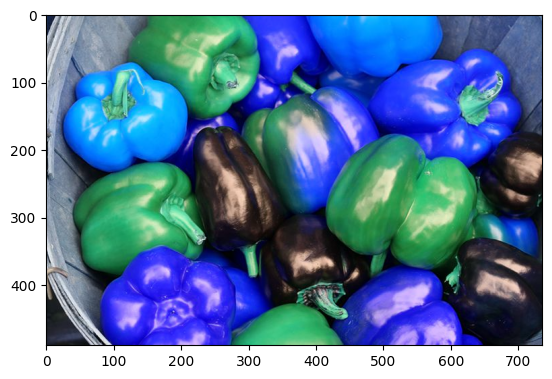

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lê a imagem
img = cv2.imread('../Pictures/peppers.jpg')
plt.imshow(img)

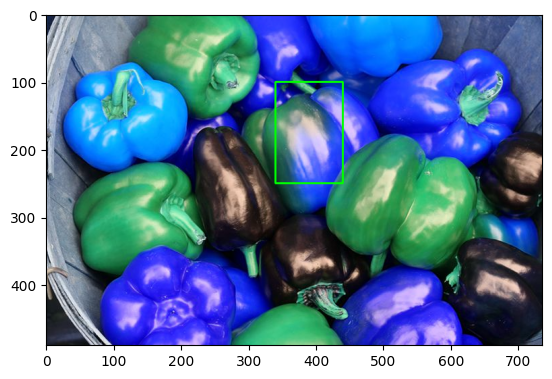

In [16]:
img = cv2.imread('../Pictures/peppers.jpg')

# Coordenadas do retângulo
x, y = 340, 100  # Ponto inicial do retângulo (canto superior esquerdo)
width, height = 100, 150  # Largura e altura do retângulo

# Cor e espessura do retângulo
color = (0, 255, 0)  # Cor verde (BGR)
thickness = 2  # Espessura da linha

# Desenhar o retângulo na imagem
image_with_rectangle = cv2.rectangle(img, (x, y), (x + width, y + height), color, thickness)

plt.imshow(image_with_rectangle)
plt.show()

In [3]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

kernel = np.ones((10,10), np.uint8)

lower_green = np.array([36, 0, 0])
upper_green = np.array([86, 255, 255])
lower_red = np.array([0, 50, 50])
upper_red = np.array([10, 255, 255])

mask_green = cv2.inRange(hsv, lower_green, upper_green)
mask_green = cv2.dilate(mask_green, kernel, iterations=1)

mask_red = cv2.inRange(hsv, lower_red, upper_red)
mask_red = cv2.dilate(mask_red, kernel, iterations=1)

img_fil_red = cv2.bitwise_or(hsv, hsv, mask=mask_red)
img_fil_green = cv2.bitwise_or(hsv, hsv, mask=mask_green)

mask = cv2.bitwise_and(mask_green, mask_red)

kernel = np.ones((5,5), np.uint8)
mask = cv2.erode(mask, kernel)

img = cv2.bitwise_or(hsv, hsv, mask=mask)

contorns, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

merged_contour = np.concatenate(contorns)

epsilon = 0.01 * cv2.arcLength(merged_contour, True)
approximated_contour = cv2.approxPolyDP(merged_contour, epsilon, True)

hull = cv2.convexHull(approximated_contour)

x, y, w, h = cv2.boundingRect(hull)

scale_factor = 3
new_x = int(x - (scale_factor - 1) * w / 2)
new_y = int(y - (scale_factor - 1) * h / 2)
new_w = int(w * scale_factor)
new_h = int(h * scale_factor)

image_with_merged_contour = cv2.rectangle(img.copy(), (new_x, new_y), (new_x + new_w, new_y + new_h), (0, 255, 0), 2)

plt.imshow(image_with_merged_contour)
plt.show()

error: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/contours.cpp:195: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


In [2]:


# Define as faixas de cores para verde e vermelho
lower_green = np.array([36, 0, 0])
upper_green = np.array([86, 255, 255])
lower_red = np.array([0, 50, 50])
upper_red = np.array([10, 255, 255])

#### Máscaras

In [3]:
# Criando um kernel para morfologias
kernel = np.ones((10,10), np.uint8)

# Cria máscaras separadas para verde e vermelho
mask_green = cv2.inRange(hsv, lower_green, upper_green)
mask_green = cv2.dilate(mask_green, kernel, iterations=1)

mask_red = cv2.inRange(hsv, lower_red, upper_red)
mask_red = cv2.dilate(mask_red, kernel, iterations=1)

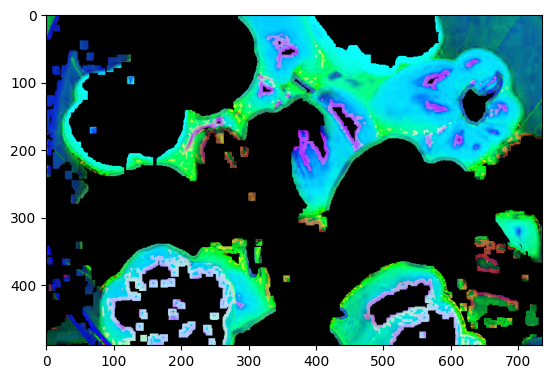

In [8]:
img_fil_red = cv2.bitwise_or(hsv, hsv, mask=mask_red)

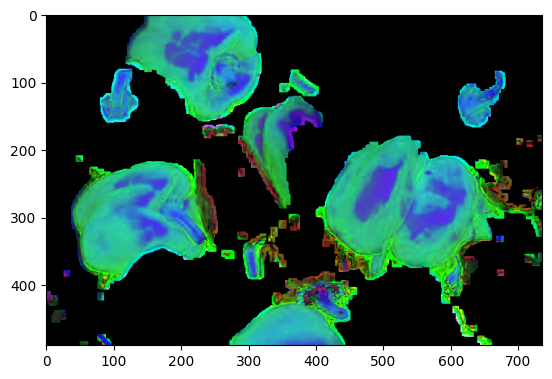

In [9]:
img_fil_green = cv2.bitwise_or(hsv, hsv, mask=mask_green)
plt.imshow(img_fil)

In [ ]:
# Combina as duas máscaras em uma única máscara
mask = cv2.bitwise_and(mask_green, mask_red)

img = cv2.bitwise_or(hsv, hsv, mask=mask)

# mask_green = cv2.inRange(hsv, lower_green, upper_green)
# img_green = cv2.bitwise_and(hsv, hsv, mask=mask_green)

# img = cv2.bitwise_and(img_red, img_green)

# Aplica a máscara na imagem original para obter a região de interesse
# roi = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(img)
plt.show()

# Fazer duas máscaras de verde e vermelha
# 